# Alfred : Etude du dataset

In [1]:
!pip install gitpython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 4.8 MB/s eta 0:00:00


In [2]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import git

In [3]:
plt.style.use('seaborn-whitegrid')

## Chargement de données

In [5]:
# clonage du repository Alfred
git.Repo.clone_from("https://github.com/askforalfred/alfred.git", "alfred")

<git.repo.base.Repo '/content/alfred/.git'>

In [ ]:
# chargement des données
#!wget https://ai2-vision-alfred.s3-us-west-2.amazonaws.com/json_feat_2.1.0.7z

In [6]:
# chemin du dossier du petit dataset
BASE_DIR = 'alfred/data/json_2.1.0/'
# nombre d'éléments 
print(len(os.listdir(BASE_DIR)))

5


In [7]:
# récupère les données en filtrant les infos pertinentes
def get_info_from_file(file):
    # toutes les informations
    dic = json.load(file)

    # filtrage des informtions à conserver
    info = {}

    # identifiant de la tâche
    info['id'] = dic['task_id']

    # type de la tâche
    if 'task_type' in dic:
        info['type'] = dic['task_type']
    else:
        # pour les données de test
        info['type'] = 'UNKNOWN'
    
    # informations sur la scène
    scene = {}
    # récupération de la liste des objets
    objects = []
    for obj in dic['scene']['object_poses']:
        scene_object = {}
        name, id = obj['objectName'].split('_')
        # nom de l'objet
        scene_object['name'] = name
        # identifiant de l'objet
        scene_object['id'] = id
        # position de l'objet
        scene_object['position'] = [obj['position']['x'], obj['position']['y'], obj['position']['z']]
        # rotation de l'objet
        scene_object['rotation'] = [obj['rotation']['x'], obj['rotation']['y'], obj['rotation']['z']]
        objects.append(scene_object)
    scene['objects'] = objects
    info['scene'] = scene

    # récupération des annotations des experts
    descriptions = []
    for ann in dic['turk_annotations']['anns']:
        desc = {}
        # description
        desc['input'] = ann['task_desc']
        # découpage élémentaire
        desc['output'] = ann['high_descs']
        # votes : pas présent pour les données de test
        if 'votes' in ann:
            desc['score'] = round( np.mean(ann['votes']), 2 )
        else:
            desc['score'] = 0
        descriptions.append(desc)
    info['descriptions'] = descriptions

    return info

In [8]:
# base_dir : ex : alfred/data/json_2.1.0/train/
def get_data_from_dir(base_dir):
    data = []
    
    for dir1 in os.listdir(base_dir):
        if dir1 == '.DS_Store': continue
        
        subdir = base_dir + dir1 + '/'
        for dir2 in os.listdir(subdir):
            if dir2 == '.DS_Store': continue
            
            filename = subdir + dir2 + '/' + 'traj_data.json'
            with open(filename) as file:
                info = get_info_from_file(file)
                # ajout aux données
                data.append(info)

    return data

In [9]:
# base_dir : ex : alfred/data/json_2.1.0/tests_seen/
def get_data_from_test_dir(base_dir):
    data = []
    
    for dir1 in os.listdir(base_dir):
        if dir1 == '.DS_Store': continue
        
        filename = base_dir + dir1 + '/'  + 'traj_data.json'
        with open(filename) as file:
            info = get_info_from_file(file)
            # ajout aux données
            data.append(info)

    return data

In [10]:
base_train = BASE_DIR + 'train/'
base_valid_seen = BASE_DIR + 'valid_seen/'
base_valid_unseen = BASE_DIR + 'valid_unseen/'
base_test_seen = BASE_DIR + 'tests_seen/'
base_test_unseen = BASE_DIR + 'tests_unseen/'

print('Taille des dossiers')
print('Train :\t\t', len(os.listdir(base_train)))
print('Valid seen :\t', len(os.listdir(base_valid_seen)))
print('Valid unseen :\t', len(os.listdir(base_valid_unseen)))
print('Tests seen :\t', len(os.listdir(base_test_seen)))
print('Tests unseen :\t', len(os.listdir(base_test_unseen)))

Taille des dossiers
Train :		 2435
Valid seen :	 242
Valid unseen :	 85
Tests seen :	 483
Tests unseen :	 488


In [11]:
data_train = get_data_from_dir(base_train)
print(len(data_train))

6574


In [ ]:
data_train[0]

{'id': 'trial_T20190908_073132_917743',
 'type': 'pick_cool_then_place_in_recep',
 'scene': {'objects': [{'name': 'SprayBottle',
    'id': '4f8d0eee',
    'position': [1.20097, 0.8857041, 2.477],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'SprayBottle',
    'id': '4f8d0eee',
    'position': [-0.91988194, 0.749030352, 2.83014464],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'DishSponge',
    'id': '4b57442b',
    'position': [1.450345, 0.885864258, 2.58481264],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'Glassbottle',
    'id': '6018293c',
    'position': [-0.0824483, 0.7592729, -0.533726156],
    'rotation': [1.40334191e-14, 0.0, 0.0]},
   {'name': 'Glassbottle',
    'id': '6018293c',
    'position': [0.951595068, 0.8870167, 2.15356255],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'Spoon',
    'id': '1d6d1e51',
    'position': [1.20097, 0.8874294, 2.692625],
    'rotation': [0.0, 270.0, 0.0]},
   {'name': 'Fork',
    'id': '9f8771c2',
    'position': [1.28637147, 0.9120486, 0

In [12]:
data_valid_seen = get_data_from_dir(base_valid_seen)
print(len(data_valid_seen))

251


In [ ]:
data_valid_seen[0]

{'id': 'trial_T20190909_113054_894334',
 'type': 'pick_and_place_simple',
 'scene': {'objects': [{'name': 'CellPhone',
    'id': 'e9073545',
    'position': [0.5847936, 0.6474927, 0.5983121],
    'rotation': [0.0, -2.3905659e-05, 0.0]},
   {'name': 'Pen',
    'id': '290c3680',
    'position': [-0.934662342, 1.35304332, -2.22205615],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'Pencil',
    'id': 'b9e0bc7f',
    'position': [0.101288974, 0.148758918, -2.15765119],
    'rotation': [0.0, 89.99995, 0.0]},
   {'name': 'Pencil',
    'id': 'b9e0bc7f',
    'position': [1.6398344, 0.377508134, -0.9309873],
    'rotation': [0.0, 179.999954, 0.0]},
   {'name': 'CreditCard',
    'id': '610c6ee4',
    'position': [1.61593139, 0.3743477, -1.10202527],
    'rotation': [0.0, 89.99995, 0.0]},
   {'name': 'CreditCard',
    'id': '610c6ee4',
    'position': [1.80726135, 0.680996, -1.06536758],
    'rotation': [0.0, 269.999939, 0.0]},
   {'name': 'Book',
    'id': '0c07f8c5',
    'position': [0.5847938,

In [13]:
data_valid_unseen = get_data_from_dir(base_valid_unseen)
print(len(data_valid_unseen))

255


In [ ]:
data_valid_unseen[0]

{'id': 'trial_T20190907_194015_037530',
 'type': 'pick_and_place_with_movable_recep',
 'scene': {'objects': [{'name': 'CreditCard',
    'id': '0304788b',
    'position': [-1.10427678, 0.930496, -0.643],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'DishSponge',
    'id': 'f11e4d33',
    'position': [1.21275449, 2.20769572, -1.40890622],
    'rotation': [-7.062251e-30, 270.0, 0.0]},
   {'name': 'ButterKnife',
    'id': 'b86b8dfc',
    'position': [-0.6247657, 0.933542, 0.16271013],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'ButterKnife',
    'id': 'b86b8dfc',
    'position': [-1.167114, 0.9335421, 0.144211411],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'ButterKnife',
    'id': 'b86b8dfc',
    'position': [-0.698599339, 0.933542, -1.2314738],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'Fork',
    'id': '1427a484',
    'position': [-0.772433162, 0.9340485, 0.16271013],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'Fork',
    'id': '1427a484',
    'position': [0.874041557, 0.1

In [14]:
data_test_seen = get_data_from_test_dir(base_test_seen)
print(len(data_test_seen))

483


In [ ]:
data_test_seen[0]

{'id': 'trial_T20190908_064522_624362',
 'type': 'UNKNOWN',
 'scene': {'objects': [{'name': 'Potato',
    'id': '027e0a30',
    'position': [-2.05486441, 0.832557559, -3.70596051],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'Potato',
    'id': '027e0a30',
    'position': [-0.8554549, 0.9336739, 0.8439424],
    'rotation': [0.0, 270.000336, 0.0]},
   {'name': 'DishSponge',
    'id': '11e4138d',
    'position': [0.62322855, 0.760119259, -0.061030075],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'DishSponge',
    'id': '11e4138d',
    'position': [0.5821031, 0.8831642, -0.10800001],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'ButterKnife',
    'id': '0ad5c562',
    'position': [-1.05636227, 0.900662839, 0.8439436],
    'rotation': [0.0, 270.000336, 0.0]},
   {'name': 'ButterKnife',
    'id': '0ad5c562',
    'position': [-2.13780355, 0.70183146, -1.09179544],
    'rotation': [0.0, 90.0, 0.0]},
   {'name': 'Spoon',
    'id': '93a81026',
    'position': [0.9619548, 0.6665257, 0.38726

In [15]:
data_test_unseen = get_data_from_test_dir(base_test_unseen)
print(len(data_test_unseen))

488


In [ ]:
data_test_unseen[0]

{'id': 'trial_T20190907_190822_091724',
 'type': 'UNKNOWN',
 'scene': {'objects': [{'name': 'Potato',
    'id': '623293af',
    'position': [-0.08721179, 0.8006406, -0.6519],
    'rotation': [0.0, 90.0, 1.40334191e-14]},
   {'name': 'Potato',
    'id': '623293af',
    'position': [2.77700067, 1.32367122, -0.644],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'Kettle',
    'id': '22c296f5',
    'position': [1.68890381, 0.9128413, 1.299],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'ButterKnife',
    'id': '1ff7ea32',
    'position': [0.123259753, 0.7658982, -0.6519],
    'rotation': [1.40334191e-14, 0.0, 0.0]},
   {'name': 'Pot',
    'id': '8f9d0722',
    'position': [2.48830628, 0.9155004, 1.46853542],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'Pot',
    'id': '8f9d0722',
    'position': [0.2815, 0.9646, 1.0827],
    'rotation': [0.0, 0.0, 0.0]},
   {'name': 'Spoon',
    'id': '8e187b06',
    'position': [1.276236, 0.7735443, -0.4601],
    'rotation': [0.0, 270.0, 0.0]},
   {'nam

In [16]:
all_data = data_train + data_valid_seen + data_valid_unseen + data_test_seen + data_test_unseen
print(len(all_data))

8051


In [17]:
# Nombre d'éléments dont on connait le type de tâche
KNOWN_TYPE_SIZE = len(data_train) + len(data_valid_seen) + len(data_valid_unseen)
print(KNOWN_TYPE_SIZE)

7080


## Types de tâches

Observons quels sont les différentes types de tâches de notre dataset. Etudions notamment la fréquence de chacune.

Après une étude générale du dataset, nous pourrons faire une étude par type d'instructions.

In [ ]:
# compte les occurences des différentes taches existentes du dataset
def get_task_types(data):
    types = dict()

    for x in data:
        type_ = x['type'].strip()
        if type_ not in types:
            types[type_] = 0

        types[type_] += 1

    return types

In [ ]:
task_types = get_task_types(all_data)
tmpdf = pd.DataFrame()
tmpdf['Type'] = task_types.keys()
tmpdf['Count'] = task_types.values()
tmpdf.sort_values(by='Count')

,Type,Count
4,look_at_obj_in_light,794
5,pick_clean_then_place_in_recep,968
7,UNKNOWN,971
0,pick_cool_then_place_in_recep,994
1,pick_heat_then_place_in_recep,994
3,pick_and_place_with_movable_recep,1055
2,pick_and_place_simple,1110
6,pick_two_obj_and_place,1165


## Classification des instructions par types

Etant donné la description de haut niveau d'une instructions, peut-on prédire son type.

In [ ]:
def get_input_and_type_from_data(data):
    input = []
    types = []

    for x in data:
        if x['type'] == 'UNKNOWN': continue
        for desc in x['descriptions']:
            input.append(desc['input'])
            types.append(x['type'])

    return input, types

In [ ]:
input_types_df = pd.DataFrame()
input_types_df['input'], input_types_df['types'] = get_input_and_type_from_data(all_data)
input_types_df.head(10)

,input,types
0,Put chilled tomato in the microwave,pick_cool_then_place_in_recep
1,Place a chilled tomato inside the microwave.,pick_cool_then_place_in_recep
2,Put a chilled tomato in a microwave.,pick_cool_then_place_in_recep
3,"cool the tomato in the refrigerator, put the t...",pick_cool_then_place_in_recep
4,Put a chilled tomato in the microwave.,pick_cool_then_place_in_recep
5,place a cold tomato in the microwave oven,pick_cool_then_place_in_recep
6,Chill and microwave a tomato.,pick_cool_then_place_in_recep
7,Cool a tomato and put it into microwave,pick_cool_then_place_in_recep
8,Put a cold tomato in the microwave.,pick_cool_then_place_in_recep
9,Put a heated cup on the counter left of the st...,pick_heat_then_place_in_recep


In [ ]:
uniques = np.unique(input_types_df.types)
types_to_int = dict(zip(uniques, np.arange(len(uniques))))
types_to_int

{'look_at_obj_in_light': 0,
 'pick_and_place_simple': 1,
 'pick_and_place_with_movable_recep': 2,
 'pick_clean_then_place_in_recep': 3,
 'pick_cool_then_place_in_recep': 4,
 'pick_heat_then_place_in_recep': 5,
 'pick_two_obj_and_place': 6}

In [ ]:
input_types_df['y'] = input_types_df['types'].map(types_to_int)
input_types_df.head(10)

,input,types,y
0,Put chilled tomato in the microwave,pick_cool_then_place_in_recep,4
1,Place a chilled tomato inside the microwave.,pick_cool_then_place_in_recep,4
2,Put a chilled tomato in a microwave.,pick_cool_then_place_in_recep,4
3,"cool the tomato in the refrigerator, put the t...",pick_cool_then_place_in_recep,4
4,Put a chilled tomato in the microwave.,pick_cool_then_place_in_recep,4
5,place a cold tomato in the microwave oven,pick_cool_then_place_in_recep,4
6,Chill and microwave a tomato.,pick_cool_then_place_in_recep,4
7,Cool a tomato and put it into microwave,pick_cool_then_place_in_recep,4
8,Put a cold tomato in the microwave.,pick_cool_then_place_in_recep,4
9,Put a heated cup on the counter left of the st...,pick_heat_then_place_in_recep,5


In [ ]:
# classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(input_types_df['input'], input_types_df['y'], 
                                                    test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       476
           1       0.86      0.93      0.89       709
           2       0.92      0.96      0.94       701
           3       0.98      0.94      0.96       623
           4       0.92      0.92      0.92       614
           5       0.95      0.96      0.96       657
           6       0.98      0.91      0.95       754

    accuracy                           0.94      4534
   macro avg       0.95      0.94      0.94      4534
weighted avg       0.94      0.94      0.94      4534



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
for type, y in types_to_int.items():
    class_idx = list(input_types_df['y'].unique()).index(y)
    print(f"Performance {type} ({y}):")
    print(classification_report(y_test, y_pred, labels=[y]))

Performance look_at_obj_in_light (0):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       476

   micro avg       1.00      0.98      0.99       476
   macro avg       1.00      0.98      0.99       476
weighted avg       1.00      0.98      0.99       476

Performance pick_and_place_simple (1):
              precision    recall  f1-score   support

           1       0.86      0.93      0.89       709

   micro avg       0.86      0.93      0.89       709
   macro avg       0.86      0.93      0.89       709
weighted avg       0.86      0.93      0.89       709

Performance pick_and_place_with_movable_recep (2):
              precision    recall  f1-score   support

           2       0.92      0.96      0.94       701

   micro avg       0.92      0.96      0.94       701
   macro avg       0.92      0.96      0.94       701
weighted avg       0.92      0.96      0.94       701

Performance pick_clean_then_place_in_recep (3):
     

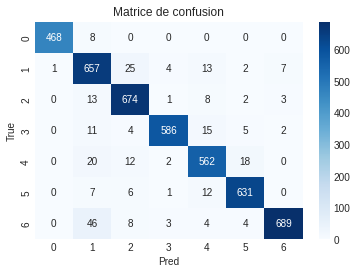

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Matrice de confusion")
plt.xlabel("Pred")
plt.ylabel("True")
plt.show()

In [ ]:
def get_output_and_type_from_data(data):
    output = []
    types = []

    for x in data:
        if x['type'] == 'UNKNOWN': continue
        for desc in x['descriptions']:
            output.append(' '.join(desc['output']))
            types.append(x['type'])

    return output, types

In [ ]:
output_types_df = pd.DataFrame()
output_types_df['output'], output_types_df['types'] = get_output_and_type_from_data(all_data)
output_types_df['y'] = output_types_df['types'].map(types_to_int)
output_types_df.head(10)

,output,types,y
0,Move forward towards the stove then turn left ...,pick_cool_then_place_in_recep,4
1,Walk to the stove and then turn left and look ...,pick_cool_then_place_in_recep,4
2,move to the counter across from the fridge pic...,pick_cool_then_place_in_recep,4
3,"turn right, walk to the white table on the rig...",pick_cool_then_place_in_recep,4
4,"Turn around, move to the square table. Pick up...",pick_cool_then_place_in_recep,4
5,move around to the table pick up the tomato fr...,pick_cool_then_place_in_recep,4
6,Turn to the left and walk forward to the sink ...,pick_cool_then_place_in_recep,4
7,"Turn left, go forward, turn right and go to th...",pick_cool_then_place_in_recep,4
8,"Turn to your left and go to the dishwasher, tu...",pick_cool_then_place_in_recep,4
9,Move to the counter left of the fridge. Pick ...,pick_heat_then_place_in_recep,5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(output_types_df['output'], output_types_df['y'], 
                                                    test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       476
           1       0.75      0.66      0.70       709
           2       0.89      0.93      0.91       701
           3       0.94      0.94      0.94       623
           4       0.86      0.93      0.89       614
           5       0.89      0.94      0.92       657
           6       0.74      0.71      0.73       754

    accuracy                           0.86      4534
   macro avg       0.86      0.87      0.87      4534
weighted avg       0.86      0.86      0.86      4534



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
for type, y in types_to_int.items():
    class_idx = list(output_types_df['y'].unique()).index(y)
    print(f"Performance {type} ({y}):")
    print(classification_report(y_test, y_pred, labels=[y]))

Performance look_at_obj_in_light (0):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       476

   micro avg       0.98      0.99      0.98       476
   macro avg       0.98      0.99      0.98       476
weighted avg       0.98      0.99      0.98       476

Performance pick_and_place_simple (1):
              precision    recall  f1-score   support

           1       0.75      0.66      0.70       709

   micro avg       0.75      0.66      0.70       709
   macro avg       0.75      0.66      0.70       709
weighted avg       0.75      0.66      0.70       709

Performance pick_and_place_with_movable_recep (2):
              precision    recall  f1-score   support

           2       0.89      0.93      0.91       701

   micro avg       0.89      0.93      0.91       701
   macro avg       0.89      0.93      0.91       701
weighted avg       0.89      0.93      0.91       701

Performance pick_clean_then_place_in_recep (3):
     

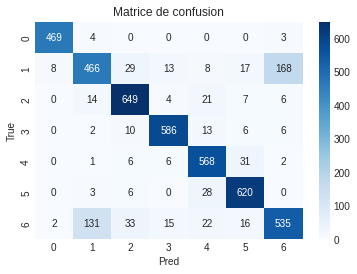

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Matrice de confusion")
plt.xlabel("Pred")
plt.ylabel("True")
plt.show()

## Axe 1 : Instructions - Input et output

Etude du dataset **Alfred** :

- **Input** : instruction de haut niveau d'entrée
- **Output** : instructions atomiques (élémentaires) données en sortie pour la réalisation de l'instruction d'entrée.

Dans ce premier axe d'étude, nous allons étudier les relations entre les différents triplets d'input et output, selon **Alfred** et selon **ConceptNet**.

#### Extraction des concepts et relations importantes étant donnée une phrase

**Première approche**
- **Concepts** : noms
- **Relations** : verbes

In [18]:
import nltk
from nltk.corpus import wordnet
import spacy

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

nlp = spacy.load('en_core_web_sm')

def extract_nouns_verbs(sentence):
    doc = nlp(sentence)
    nouns = []
    verbs = []
    for token in doc:
        if token.pos_ == 'NOUN':
            nouns.append(token.lemma_)
        elif token.pos_ == 'VERB':
            verbs.append(token.lemma_)
    nouns = list(set(nouns))
    verbs = list(set(verbs))
    return nouns, verbs


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [19]:
for i in np.random.randint(0, len(all_data), 10):
    x = all_data[i]
    sentence = x['descriptions'][0]['input']
    print(sentence)
    nouns, verbs = extract_nouns_verbs(sentence)
    print('\tNouns :\t', nouns)
    print('\tVerbs :\t', verbs)

To heat a piece of apple and place it on the end of the table.
	Nouns :	 ['end', 'table', 'apple', 'piece']
	Verbs :	 ['place', 'heat']
Move the bottle from the cabinet to the toilet
	Nouns :	 ['toilet', 'cabinet', 'bottle']
	Verbs :	 ['move']
Put the cellphone in the safe. 
	Nouns :	 ['cellphone']
	Verbs :	 ['put']
Place wet soap on the edge of the bathtub.
	Nouns :	 ['edge', 'soap', 'bathtub']
	Verbs :	 ['place']
Slice an apple in the sink and cool a slice of it down in the refrigerator
	Nouns :	 ['refrigerator', 'slice', 'sink', 'apple']
	Verbs :	 ['cool', 'slice']
Move a set of keys to a chair. 
	Nouns :	 ['chair', 'set', 'key']
	Verbs :	 ['move']
Place two pieces of soap on the back end of the toilet. 
	Nouns :	 ['soap', 'toilet', 'end', 'piece']
	Verbs :	 ['place']
Put two slices of bread on the table. 
	Nouns :	 ['table', 'bread', 'slice']
	Verbs :	 ['put']
Look at a book by the light of a lamp.
	Nouns :	 ['lamp', 'book', 'light']
	Verbs :	 ['look']
Move a credit card to the che

Les noms dans les descriptions des instructions sont-ils des objets décrits dans la scène ? A quel point ?

In [20]:
# comptage des noms présents dans les objets de la scène
def compute_correlation_nouns_scene_objects_from_data(data):
    index = 0
    cpt = 0

    for x in data:
        # récupération des noms des objets sur la scène
        objects = set()
        for obj in x['scene']['objects']:
            objects.add(obj['name'].lower())
        for desc in x['descriptions']:
            input = desc['input']
            nouns, _ = extract_nouns_verbs(input)
            for noun in nouns:
                cpt += 1
                if noun.lower() in objects:
                    index += 1

    return index / cpt

In [ ]:
compute_correlation_nouns_scene_objects_from_data(all_data)

0.2749863106568277

In [21]:
import re

# classement des objets de la scène qui se retrouvent dans la description des instructions
def get_objets_in_desc_ratio_from_data(data):
    index = {}
    cpt = {}

    for x in data:
        # récupération des noms des objets sur la scène
        objects = set()
        for obj in x['scene']['objects']:
            obj_name = obj['name']
            obj_name = ' '.join(re.findall('[A-Z][a-z]*', obj_name)).lower()
            objects.add(obj_name)
            if obj_name not in index:
                index[obj_name] = 0
                cpt[obj_name] = 0
        # comptage 
        for desc in x['descriptions']:
            input = desc['input']
            for obj_name in objects:
                cpt[obj_name] += 1
                if obj_name in input:
                    index[obj_name] += 1

    ratios = {k: index[k] / cpt[k] for k in index.keys()}     
    return ratios

In [22]:
objects_ratio = get_objets_in_desc_ratio_from_data(all_data)

In [23]:
objects_ratio

{'spray bottle': 0.08509263248599741,
 'dish sponge': 0.0,
 'glassbottle': 0.0,
 'spoon': 0.04975124378109453,
 'fork': 0.03200415831291305,
 'spatula': 0.021831142793495212,
 'egg': 0.05190465582535086,
 'cup': 0.07722581124229598,
 'plate': 0.06754684270187371,
 'knife': 0.10195292195737729,
 'tomato': 0.11130912601173239,
 'soap bottle': 0.0023094688221709007,
 'bowl': 0.06579111944965603,
 'lettuce': 0.06697854013514518,
 'pepper shaker': 0.0009653226405286998,
 'mug': 0.06969410280668559,
 'apple': 0.10796762456374842,
 'bread': 0.06363703868716121,
 'kettle': 0.031728834545735954,
 'cell phone': 0.031509596104268116,
 'pot': 0.15155565456300588,
 'wine bottle': 0.01027326895418122,
 'salt shaker': 0.013514516967401797,
 'potato': 0.10893294720427713,
 'butter knife': 0.006501950585175552,
 'pan': 0.08145837974307567,
 'pencil': 0.10753821823932525,
 'paper towel roll': 0.0,
 'ladle': 0.025976959566297718,
 'vase': 0.03143143143143143,
 'statue': 0.03506632108553133,
 'c d': 0.0,


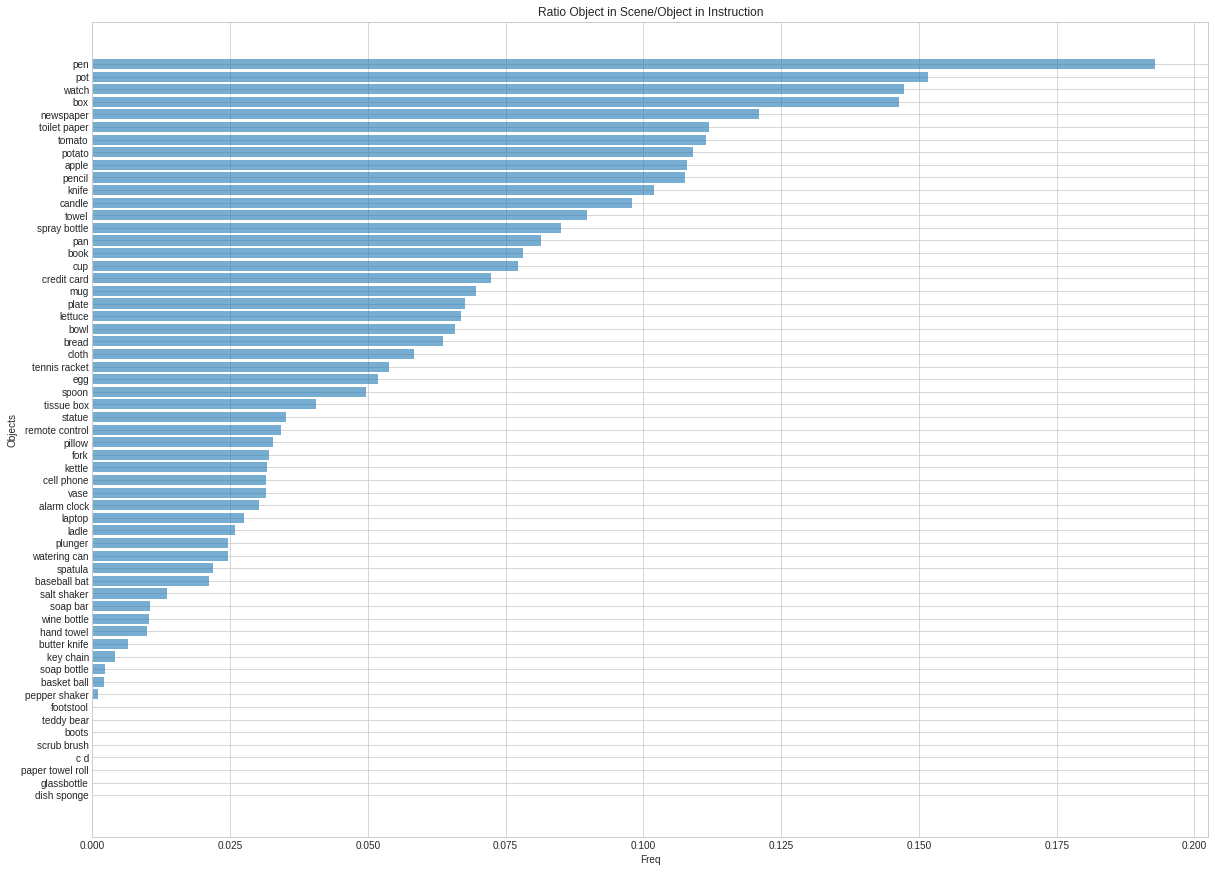

In [ ]:
sorted_data = sorted(objects_ratio.items(), key=lambda x: x[1])
objects = [i[0] for i in sorted_data]
values = [i[1] for i in sorted_data]
fig, ax = plt.subplots(figsize=(20, 15))
ax.barh(objects, values, alpha=.6)
plt.xlabel("Freq")
plt.ylabel("Objects")
plt.title('Ratio Object in Scene/Object in Instruction')
plt.show()

Les noms dans les descriptions détaillées des instructions (output) sont-ils des objets décrits dans la scène ? A quel point ?

In [24]:
# comptage des noms présents dans les objets de la scène
def compute_correlation_nouns_output_scene_objects_from_data(data):
    index = 0
    cpt = 0

    for x in data:
        # récupération des noms des objets sur la scène
        objects = set()
        for obj in x['scene']['objects']:
            objects.add(obj['name'].lower())
        for desc in x['descriptions']:
            output = desc['output']
            for out in output:
                nouns, _ = extract_nouns_verbs(out)
                for noun in nouns:
                    cpt += 1
                    if noun.lower() in objects:
                        index += 1

    return index / cpt

In [ ]:
compute_correlation_nouns_output_scene_objects_from_data(all_data)

0.18554288886042442

In [25]:
# classement des objets de la scène qui se retrouvent dans la description détaillée des instructions
def get_objets_in_output_desc_ratio_from_data(data):
    index = {}
    cpt = {}

    for x in data:
        # récupération des noms des objets sur la scène
        objects = set()
        for obj in x['scene']['objects']:
            obj_name = obj['name']
            obj_name = ' '.join(re.findall('[A-Z][a-z]*', obj_name)).lower()
            objects.add(obj_name)
            if obj_name not in index:
                index[obj_name] = 0
                cpt[obj_name] = 0
        # comptage 
        for desc in x['descriptions']:
            output = desc['output']
            for out in output:
                for obj_name in objects:
                    cpt[obj_name] += 1
                    if obj_name in out:
                        index[obj_name] += 1

    ratios = {k: index[k] / cpt[k] for k in index.keys()}     
    return ratios

In [26]:
objects_output_ratio = get_objets_in_output_desc_ratio_from_data(all_data)

In [27]:
objects_output_ratio

{'spray bottle': 0.04717734931387876,
 'dish sponge': 1.839892550275064e-05,
 'glassbottle': 0.0,
 'spoon': 0.02433854277070125,
 'fork': 0.015560865627348583,
 'spatula': 0.011244291137533,
 'egg': 0.024772127261865763,
 'cup': 0.03633438035958607,
 'plate': 0.0339678984695782,
 'knife': 0.12272368142138632,
 'tomato': 0.06238799067311583,
 'soap bottle': 0.0010404514928902481,
 'bowl': 0.031406533035114426,
 'lettuce': 0.0424431040795483,
 'pepper shaker': 0.00062628870945985,
 'mug': 0.03296571668135422,
 'apple': 0.05978648372612876,
 'bread': 0.04610448422715973,
 'kettle': 0.014955073236778402,
 'cell phone': 0.018984119287186324,
 'pot': 0.07985662806158828,
 'wine bottle': 0.007277628032345013,
 'salt shaker': 0.007457653248029599,
 'potato': 0.058524271096294295,
 'butter knife': 0.00975682382133995,
 'pan': 0.03790491973869308,
 'pencil': 0.0553078143237662,
 'paper towel roll': 0.00042340165873826306,
 'ladle': 0.012192613920145723,
 'vase': 0.017915953102358054,
 'statue': 

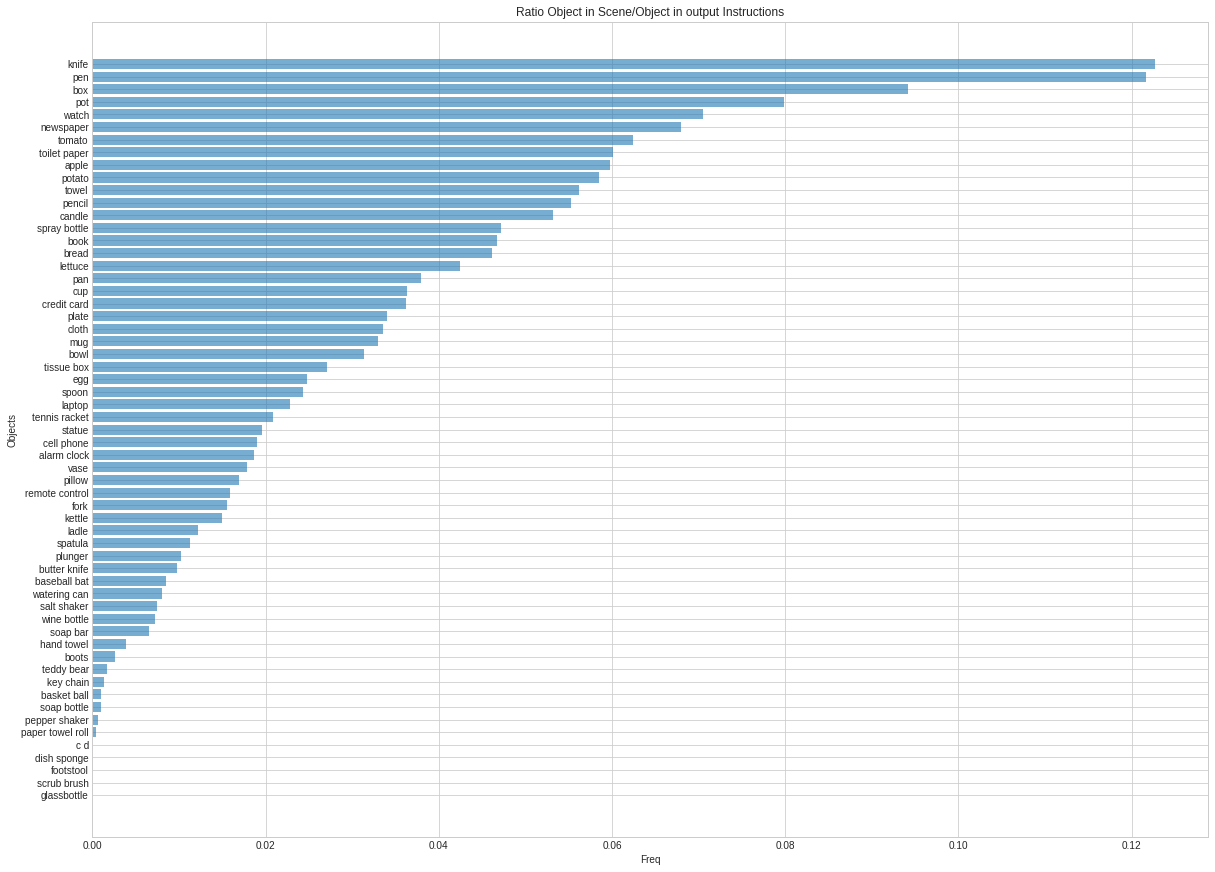

In [ ]:
sorted_data = sorted(objects_output_ratio.items(), key=lambda x: x[1])
objects = [i[0] for i in sorted_data]
values = [i[1] for i in sorted_data]
fig, ax = plt.subplots(figsize=(20, 15))
ax.barh(objects, values, alpha=.6)
plt.xlabel("Freq")
plt.ylabel("Objects")
plt.title('Ratio Object in Scene/Object in output Instructions')
plt.show()

Les noms des objets sont-ils plus présents dans la description de l'instruction (input) ou dans son découpage en instructions élémentaires (output) ?

In [28]:
objects_ratio_diff = {k: objects_ratio[k] - objects_output_ratio[k] for k in objects_ratio}

In [29]:
objects_ratio_diff

{'spray bottle': 0.037915283172118654,
 'dish sponge': -1.839892550275064e-05,
 'glassbottle': 0.0,
 'spoon': 0.02541270101039328,
 'fork': 0.016443292685564465,
 'spatula': 0.010586851655962211,
 'egg': 0.027132528563485095,
 'cup': 0.04089143088270991,
 'plate': 0.03357894423229551,
 'knife': -0.020770759464009025,
 'tomato': 0.048921135338616556,
 'soap bottle': 0.0012690173292806525,
 'bowl': 0.034384586414541604,
 'lettuce': 0.024535436055596875,
 'pepper shaker': 0.0003390339310688497,
 'mug': 0.036728386125331365,
 'apple': 0.04818114083761966,
 'bread': 0.01753255446000148,
 'kettle': 0.016773761308957552,
 'cell phone': 0.012525476817081792,
 'pot': 0.0716990265014176,
 'wine bottle': 0.002995640921836207,
 'salt shaker': 0.006056863719372197,
 'potato': 0.05040867610798283,
 'butter knife': -0.003254873236164398,
 'pan': 0.04355346000438259,
 'pencil': 0.05223040391555905,
 'paper towel roll': -0.00042340165873826306,
 'ladle': 0.013784345646151995,
 'vase': 0.013515478329073

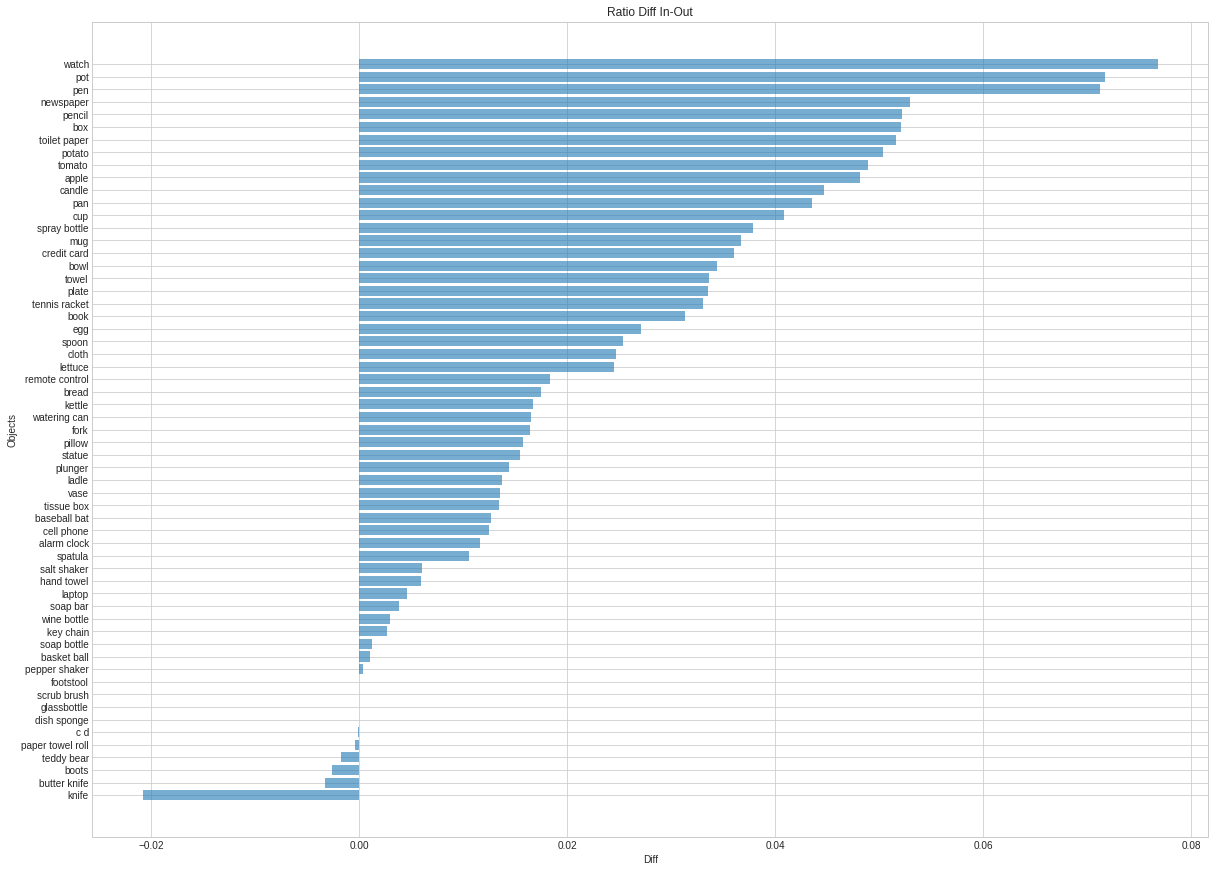

In [30]:
sorted_data = sorted(objects_ratio_diff.items(), key=lambda x: x[1])
objects = [i[0] for i in sorted_data]
values = [i[1] for i in sorted_data]
fig, ax = plt.subplots(figsize=(20, 15))
ax.barh(objects, values, alpha=.6)
plt.xlabel("Diff")
plt.ylabel("Objects")
plt.title('Ratio Diff In-Out')
plt.show()

### Extraction des couples (verbes-objets) étant donnée une phrase

In [31]:
import spacy

nlp = spacy.load("en_core_web_sm")

### ???? Ne marche pas encore exactement bien
def extract_relations(sentence):
    doc = nlp(sentence)
    relations = []
    for token in doc:
        if token.pos_ == "VERB":
            # noms (objets) liés au verbe
            nouns = [child for child in token.children if child.pos_ == "NOUN"]
            for noun in nouns:
                # autres verbes liés à ce nom
                verbs = [child for child in noun.children if child.pos_ == "VERB" and child != token]
                # création d'un triplet si possible
                if verbs:
                    for verb in verbs:
                        relations.append((token.text, noun.text, verb.text))
                # ajout d'autres triplets
                if len(verbs) > 1:
                    for i in range(len(verbs)):
                        for j in range(i+1, len(verbs)):
                            relations.append((verbs[i].text, noun.text))
                            relations.append((verbs[j].text, noun.text))
    return relations

In [38]:
for i in np.random.randint(0, len(all_data), 10):
    x = all_data[i]
    sentence = x['descriptions'][0]['input']
    print(sentence)
    relations = extract_relations(sentence)
    print('\t', relations)

Slice the bread, cook a slice put it on the table
	 [('cook', 'slice', 'put')]
place two spray bottles on top of the white cabinet in the bathroom
	 []
Put a cup with a fork in the sink.
	 []
put a sponge in a pan and put the pan on the counter
	 []
place a clean purple cloth on top of the bathroom toilet
	 []
Wash the fork on the table, put it on the white table
	 []
Examine a credit card with the lamp light.
	 []
Place a cup with a pencil in it on a book case shelf
	 []
Inspect a credit card near a lit lamp.
	 []
Slice a tomato, cook a slice
	 []
